In [1]:
using Pkg
using Distributions
using Plots

In [31]:
k1 = 1
k2 = 0.002
eps = 0.5
alpha = 0
v = 0
F0 = 1
m = 1

1

In [32]:
function getDeltaX(k1,k2,eps,alpha,v,F0,m)
    return ((k2*sqrt(m)*v*pi)/(k2+2*k1)^1.5) + (2*F0*eps/(k2+2*k1)) + (((F0^2)*(m^1.5)*eps*alpha*pi)/(2*(k2+2*k1)^1.5))
end

getDeltaX (generic function with 1 method)

In [33]:
dx = getDeltaX(k1,k2,eps,alpha,v,F0,m)
dx

0.4995004995004996

In [34]:
#threshold = 1
threshold = 1
avalanchesData = zeros(1_000)
L = 1_000
increament = k1*dx
decreament = (2*k1 + k2)*dx
maxSteps = 20000;


In [35]:
1/L,increament,decreament,decreament-2*increament

(0.001, 0.4995004995004996, 1.0, 0.0009990009990008542)

In [36]:
function getHist(avalanchesData)
    sortedValues = collect(Set(avalanchesData))
    sort!(sortedValues)

    counts = zeros(length(sortedValues))

    for i in 1:length(sortedValues)
        counts[i] = count(j->(j== sortedValues[i]), avalanchesData)
    end
    return counts,sortedValues
end

getHist (generic function with 1 method)

In [37]:
function stepProcess(lattice)
    A = [findmax(lattice)[2]]
    lattice .+= 1-findmax(lattice)[1]

    # A = [Int(floor(rand(Uniform(1,L+0.9999))))]
    # lattice[A[1]] += 1
    return fall(lattice,A)  
end

stepProcess (generic function with 1 method)

In [38]:
function fall(lattice,A)
    # if lattice[A[1]] < threshold
    #     return lattice,0
    # end
    nFalls = 1
    B = []
    while length(A)+length(B) != 0 
        lattice,B = check(lattice,A)
        lattice,A = check(lattice,B)  

        nFalls += length(A)+length(B)

        if nFalls > maxSteps
            println("reached to the max")
            break

        end

    end

    return lattice,nFalls

end

fall (generic function with 1 method)

In [39]:
lattice = rand(Uniform(0,threshold), L);

In [40]:
# lattice = Int.(floor.(rand(Uniform(0,threshold), L)));

In [80]:
function runProcess(lattice,steps)
    dataSet = zeros(steps)

    for _ in 1:10000
        lattice , data = stepProcess(lattice)

    end

    for i in 1:steps
        lattice , data = stepProcess(lattice)
        dataSet[i] = data
        # if i % (div(steps,100)) == 0
        #     println(i/(div(steps,100)))
        # end
    
    end 

    return dataSet,lattice

end

runProcess (generic function with 1 method)

In [81]:
function check(lattice,points)
    out = []
    for idx in points
        while(lattice[idx] >= threshold)
            lattice[idx] -= decreament 

            if idx < L
                lattice[idx+1] += increament 
                if lattice[idx+1] >= threshold
                    push!(out,idx+1)
                end
            end
                        
            if idx > 1 
                lattice[idx-1] += increament 
                if lattice[idx-1] >= threshold
                    push!(out,idx-1)
                end
            end
        end
    end
    return lattice,out  
end  

check (generic function with 1 method)

In [82]:
dataSet,lattice2 = runProcess(lattice,50_000_000)

([23.0, 42.0, 91.0, 42.0, 90.0, 85.0, 83.0, 71.0, 82.0, 30.0  …  61.0, 68.0, 36.0, 22.0, 94.0, 56.0, 56.0, 52.0, 16.0, 23.0], [0.6355514314569627, 0.9937751374164477, 0.7180008068038238, 0.5557141996117426, 0.9772160238676127, 0.8509088074771468, 0.5243675799218385, 0.7470923296045778, 0.6442635444231223, 0.7140153394828396  …  0.7566293362093387, 0.5836295330530749, 0.7391414016754653, 0.726456988323042, 0.5229680036971079, 0.5301669083530826, 0.7402543920554695, 0.8143745932117997, 0.7523644637344601, 0.8297188967293324])

In [44]:
dataSet = convert(Array{Int}, dataSet);

In [ ]:
counts ,bins  = getHist(dataSet)

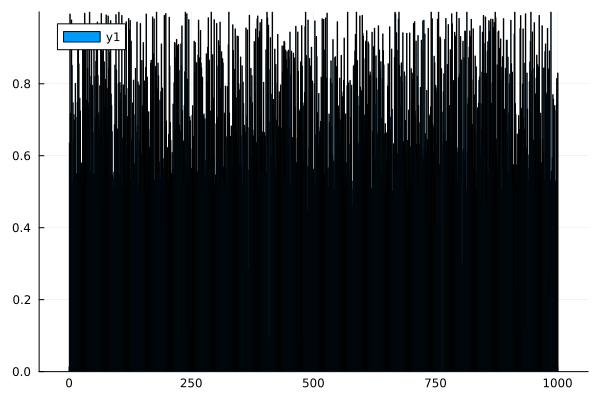

In [83]:
p = bar(collect(1:L),lattice)
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(p)

In [ ]:
counts ,bins = getHist(data)

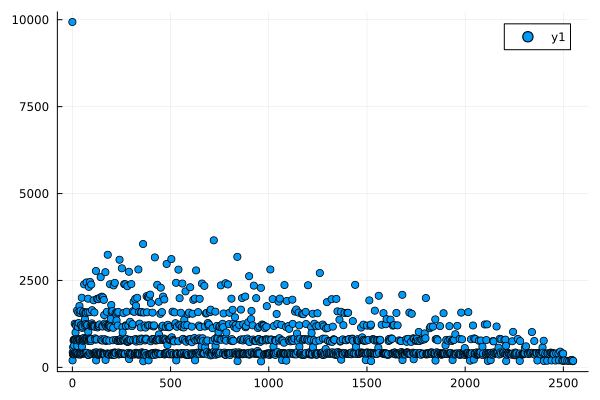

In [70]:
q = scatter(bins,counts)
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)

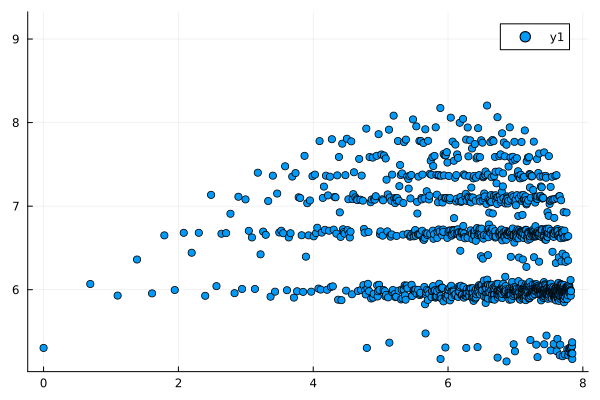

In [71]:
q = scatter(log.(bins),log.(counts))
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)

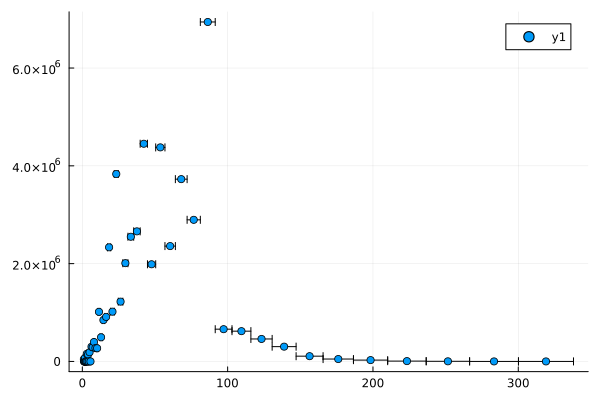

In [84]:
a = scatterhist(dataSet,bins= exp(1) .^ (range(log(findmin(dataSet)[1]),stop=log(findmax(dataSet)[1]),length=50)))

In [85]:
using StatsBase

In [86]:
h = fit(Histogram, dataSet, exp(1) .^ (range(log(findmin(dataSet)[1]),stop=log(findmax(dataSet)[1]),length=50)))

Histogram{Int64, 1, Tuple{Vector{Float64}}}
edges:
  [1.0, 1.1261870910042404, 1.2682973639445931, 1.4283401188291078, 1.6085782033888039, 1.8115600075272644, 2.0401554950567498, 2.297596782174277, 2.587523836417552, 2.914035942239215  …  115.99033323531097, 130.62681597088735, 147.1102338853999, 165.6736463563518, 186.57952184612517, 210.12344894884987, 236.6383157234833, 266.4990164047724, 300.12775204038206, 337.99999999999994]
weights: [43914, 0, 0, 0, 0, 76276, 0, 0, 0, 156107  …  619001, 459865, 302183, 107275, 48627, 27089, 6459, 2182, 242, 76]
closed: left
isdensity: false

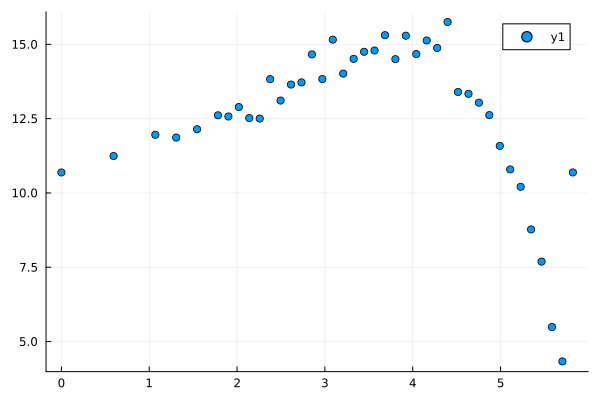

In [89]:
q = scatter(log.(h.edges[1]),log.(h.weights))
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)

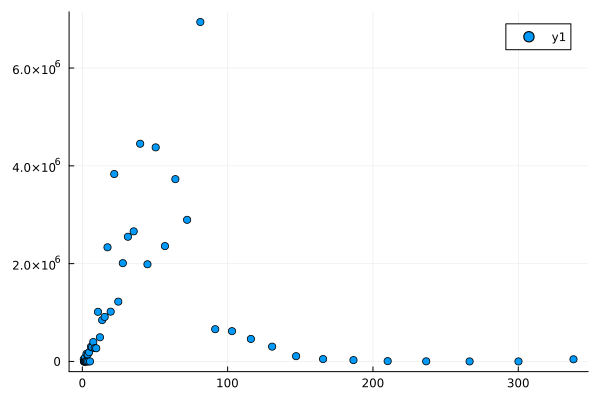

In [90]:
q = scatter(h.edges[1],h.weights)
# ylabel!("Fatturato [Dollari]")
# xlabel!("Tempo (Giorni)")
# title!("Fatturato Giornaliero")
#savefig(p,"barplot.png")
display(q)